In [51]:
# source:  <add>

# <font color='red'>Anomaly Detection with 'Anomalize' R Package</font>

> *This package is **similar** to Twitter's AnomalyDetection package, but `anomalize` does something specific which no other Anomaly Detection package was doing:  TIDY Anomaly Detection (think R tidyverse)*

>  *Open-sourced by `Business Science` does Time Series Anomaly Detection that goes inline with other Tidyverse packages (or packages supporting tidy data) – with one of the most used tidyverse functionality – compatibility with the pipe %>% operator to write readable and reproducible data pipeline. Don't want to lose your python knowledge ?  Use pipes (just my opinion)...*

In [43]:
# dependencies it turns out will include: padr, Quandl, timetk, sweep, anomalize

In [44]:

library(tidyverse)
library(devtools)
# installing github version, not from CRAN
# devtools::install_github("business-science/anomalize")  <use this

# ref:  CRAN version
# install.packages('anomalize', dependencies = T) < older slightly


In [45]:

# install.packages("coindeskr", dependencies = T) <use


## <font color='red'>Case:  Bitcoin Price Anomaly Detection</font>

In [46]:

# detect anomalies in bitcoin price since 2017

library(anomalize) #tidy anomaly detectiom

library(tidyverse) #tidyverse packages like dplyr, ggplot, tidyr

library(coindeskr) #bitcoin price extraction from coindesk


In [47]:

# Data Extraction
# We use get_historic_price() function from coindeskr to extract 
# historic bitcoin price from Coindesk. The resulting dataframe is 
# stored in the object btc

btc <- get_historic_price(start = "2017-01-01")

head(btc)

tail(btc)


,Price
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
2017-01-06,895.6700


,Price
2018-12-27,3632.680
2018-12-28,3937.050
2018-12-29,3779.713
2018-12-30,3880.907
2018-12-31,3740.500
2019-01-01,3869.470


In [48]:

# data preprocessing: 
# make it into a tibble table so to speak 

btc_ts <- btc %>% rownames_to_column() %>% as.tibble() %>% 
  mutate(date = as.Date(rowname)) %>% select(-one_of('rowname'))

head(btc_ts)

#  is.tibble(btc_ts) outputs 'TRUE', get it ? 


Price,date
997.6888,2017-01-01
1018.0500,2017-01-02
1030.8175,2017-01-03
1129.8700,2017-01-04
1005.8150,2017-01-05
895.6700,2017-01-06


Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 7 days
trend = 91 days


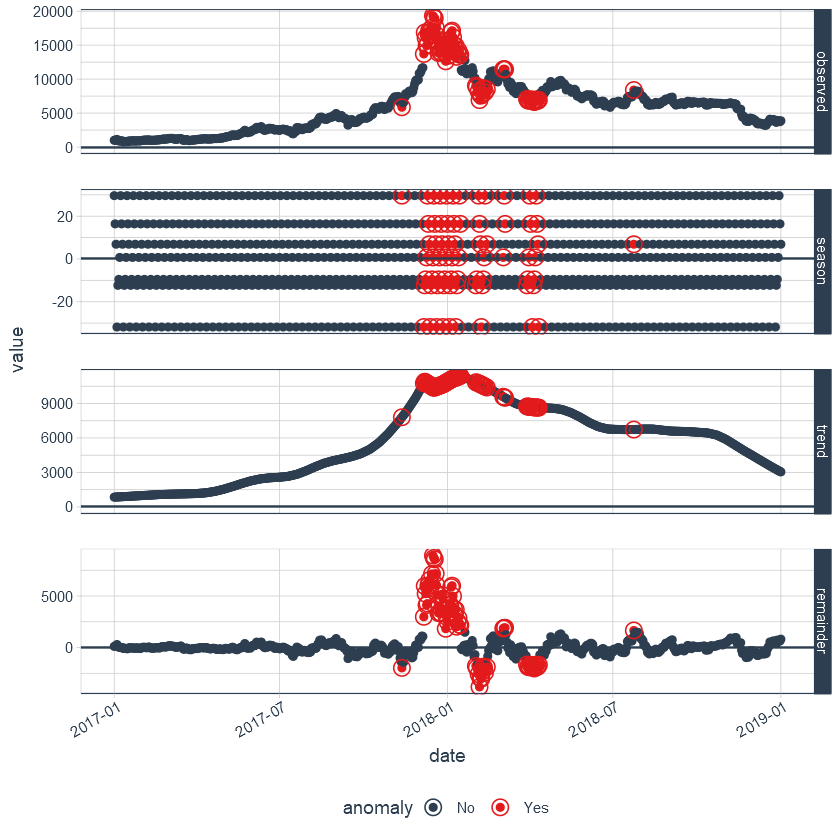

In [49]:

# > Time Series Decomposition with Anomalies < 

# One of the important things to do with Time Series data before 
# starting with Time Series forecasting or Modelling is Time Series
# Decomposition where the Time series data is decomposed into Seasonal, 
# Trend and remainder components. anomalize has got a function time_decompose() to perform the same. Once the components are decomposed, anomalize can detect and flag anomalies in the decomposed data of the reminder component which then could be visualized with plot_anomaly_decomposition() .

btc_ts %>% 
  time_decompose(Price, method = "stl", frequency = "auto", trend = "auto") %>%
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
  plot_anomaly_decomposition() 


*Decomposition happens based on ‘stl’ method which is the common method of time series decomposition but if you have been using Twitter’s AnomalyDetection, then the same can be implemented in anomalize by combining time_decompose(method = “twitter”) with anomalize(method = "gesd"). Also the ‘stl’ method of decomposition can also be combined with anomalize(method = "iqr") for a different IQR based anomaly detection.*

<br>
<hr>
<br>

## <font color='red'>Anomaly Detection</font>


*Anomaly Detection and Plotting the detected anomalies are almost similar to what we saw above with Time Series Decomposition. It’s just that decomposed components after anomaly detection are recomposed back with time_recompose() and plotted with plot_anomalies(). The package itself automatically takes care of a lot of parameter setting like index, frequency and trend, making it easier to run anomaly detection out of the box with less prior expertise in the same domain.*


Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 7 days
trend = 91 days


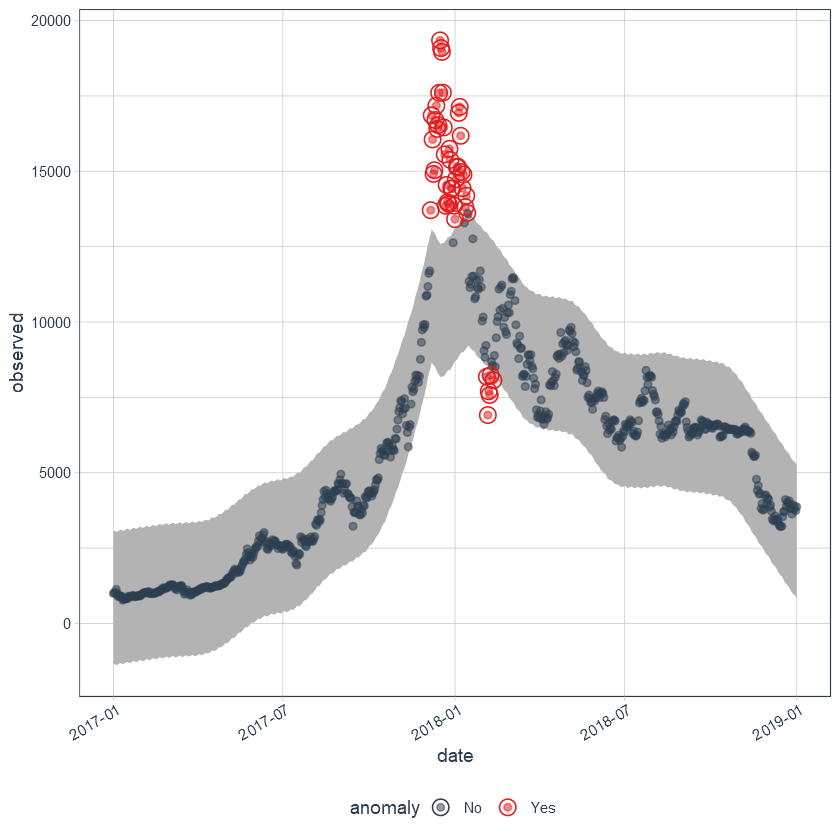

In [50]:

btc_ts %>% 
  time_decompose(Price) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

# could pipe this more into ggplot2 to make it beautiful



*It could be very well inferred from the given plot how accurate the anomaly detection is finding out the Bitcoin Price madness that happened during the early 2018.*
